In [25]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

In [26]:
# Load dataset
def load_data():
    data = pd.read_csv(r'C:\Users\sagar\OneDrive\Desktop/Parul.csv')
    return data

In [27]:
tweet_df = load_data()
tweet_df.head()

,Content,rvw-usr-name,Name,rvw-date,rvw-verified-tag,rating-block,rvw-area,rvw-area 2,rvw-area 3,rvw-area 4,rvw-area 5,ContentClg,Contentplc,Contentinf
0,"I am satisfied with the teaching and teachers we get. In the chemical engineering field, the max...",B.Tech. in Chemical Engineering - Batch of 2020,Pandya bhavin Man ...,Reviewed on 14 May 2021,Verified,4.4,Placements 3,Infrastructure 5,Faculty & Course Curriculum 5,Crowd & Campus Life 5,Value for Money 4,I am satisfied with the teaching and teachers we get.,"In the chemical engineering field, the maximum role offered by companies is GET trainee in chemi...","It has the largest infrastructure and facilities like library, food court, workshop and laborato..."
1,Our college is good for education and any other activities.The placement rate is quite high here...,B.Tech. in Information Technology Engineering - Batch of 2020,Akhil patel,Reviewed on 27 Apr 2021,Verified,4.8,Placements 5,Infrastructure 5,Faculty & Course Curriculum 4,Crowd & Campus Life 5,Value for Money 5,Our college is good for education and any other activities.,"The placement rate is quite high here, even after a bachelor degree. Seminars and entrepreneursh...","The library and hostel facilities are good here. But there is little or no freedom for girls, an..."
2,It is a life-building path college.It is one of the finest colleges in Vadodara Gujarat. Our col...,B.Tech. in Computer Science and Engineering - Batch of 2018,Vaishali Khare,Reviewed on 10 Apr 2021,Verified,5.0,Placements 5,Infrastructure 5,Faculty & Course Curriculum 5,Crowd & Campus Life 5,Value for Money 5,It is a life-building path college.,It is one of the finest colleges in Vadodara Gujarat. Our college has a good amount of placement...,NaN
3,"The college life is good, but your career depends on you and you alone.I don't know the exact pe...",B.Tech. in Computer Science and Engineering - Batch of 2025,Abhinay Katta,Reviewed on 23 Feb 2021,Verified,3.6,Placements 3,Infrastructure 4,Faculty & Course Curriculum 3,Crowd & Campus Life 4,Value for Money 4,"The college life is good, but your career depends on you and you alone.","I don't know the exact percentage of the students who got placed, but I don't think it is high. ...",Parul University has 24*7 Wi-Fi facility and large green lawns. The classrooms are above average...
4,Review of Parul University.Almost 60% of the students got placement from the civil engineering d...,B.Tech. in Civil Engineering - Batch of 2022,Shekhar Singh,Reviewed on 21 Feb 2021,Verified,4.2,Placements 4,Infrastructure 4,Faculty & Course Curriculum 4,Crowd & Campus Life 4,Value for Money 5,Review of Parul University.,Almost 60% of the students got placement from the civil engineering department. Top recruiting c...,NaN


In [28]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Content           1068 non-null   object 
 1   rvw-usr-name      1068 non-null   object 
 2   Name              1068 non-null   object 
 3   rvw-date          1068 non-null   object 
 4   rvw-verified-tag  890 non-null    object 
 5   rating-block      1068 non-null   float64
 6   rvw-area          1068 non-null   object 
 7   rvw-area 2        1068 non-null   object 
 8   rvw-area 3        1068 non-null   object 
 9   rvw-area 4        1068 non-null   object 
 10  rvw-area 5        1066 non-null   object 
 11  ContentClg        996 non-null    object 
 12  Contentplc        1068 non-null   object 
 13  Contentinf        888 non-null    object 
dtypes: float64(1), object(13)
memory usage: 116.9+ KB


In [29]:
print('Dataset size:',tweet_df.shape)
print('Columns are:',tweet_df.columns)

Dataset size: (1068, 14)
Columns are: Index(['Content', 'rvw-usr-name', 'Name', 'rvw-date', 'rvw-verified-tag',
       'rating-block', 'rvw-area', 'rvw-area 2', 'rvw-area 3', 'rvw-area 4',
       'rvw-area 5', 'ContentClg', 'Contentplc', 'Contentinf'],
      dtype='object')


In [30]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [31]:
tweet_df.drop('Name',axis='columns', inplace=True)
tweet_df.head(10)

,Content,rvw-usr-name,rvw-date,rvw-verified-tag,rating-block,rvw-area,rvw-area 2,rvw-area 3,rvw-area 4,rvw-area 5,ContentClg,Contentplc,Contentinf
0,"I am satisfied with the teaching and teachers we get. In the chemical engineering field, the max...",B.Tech. in Chemical Engineering - Batch of 2020,Reviewed on 14 May 2021,Verified,4.4,Placements 3,Infrastructure 5,Faculty & Course Curriculum 5,Crowd & Campus Life 5,Value for Money 4,I am satisfied with the teaching and teachers we get.,"In the chemical engineering field, the maximum role offered by companies is GET trainee in chemi...","It has the largest infrastructure and facilities like library, food court, workshop and laborato..."
1,Our college is good for education and any other activities.The placement rate is quite high here...,B.Tech. in Information Technology Engineering - Batch of 2020,Reviewed on 27 Apr 2021,Verified,4.8,Placements 5,Infrastructure 5,Faculty & Course Curriculum 4,Crowd & Campus Life 5,Value for Money 5,Our college is good for education and any other activities.,"The placement rate is quite high here, even after a bachelor degree. Seminars and entrepreneursh...","The library and hostel facilities are good here. But there is little or no freedom for girls, an..."
2,It is a life-building path college.It is one of the finest colleges in Vadodara Gujarat. Our col...,B.Tech. in Computer Science and Engineering - Batch of 2018,Reviewed on 10 Apr 2021,Verified,5.0,Placements 5,Infrastructure 5,Faculty & Course Curriculum 5,Crowd & Campus Life 5,Value for Money 5,It is a life-building path college.,It is one of the finest colleges in Vadodara Gujarat. Our college has a good amount of placement...,NaN
3,"The college life is good, but your career depends on you and you alone.I don't know the exact pe...",B.Tech. in Computer Science and Engineering - Batch of 2025,Reviewed on 23 Feb 2021,Verified,3.6,Placements 3,Infrastructure 4,Faculty & Course Curriculum 3,Crowd & Campus Life 4,Value for Money 4,"The college life is good, but your career depends on you and you alone.","I don't know the exact percentage of the students who got placed, but I don't think it is high. ...",Parul University has 24*7 Wi-Fi facility and large green lawns. The classrooms are above average...
4,Review of Parul University.Almost 60% of the students got placement from the civil engineering d...,B.Tech. in Civil Engineering - Batch of 2022,Reviewed on 21 Feb 2021,Verified,4.2,Placements 4,Infrastructure 4,Faculty & Course Curriculum 4,Crowd & Campus Life 4,Value for Money 5,Review of Parul University.,Almost 60% of the students got placement from the civil engineering department. Top recruiting c...,NaN
5,Review of Parul University.Almost 15% of the students are getting selected for campus placements...,B.Tech. in Chemical Engineering - Batch of 2023,Reviewed on 19 Feb 2021,Verified,4.0,Placements 3,Infrastructure 4,Faculty & Course Curriculum 4,Crowd & Campus Life 5,Value for Money 4,Review of Parul University.,Almost 15% of the students are getting selected for campus placements and got a job in the indus...,The manufacturing of college is very good. The library system and hostel are more for help and s...
6,"I am a part of the Parul University, which is one of the best colleges in Western India.Almost 1...",B.Tech. in Computer Science and Engineering - Batch of 2023,Reviewed on 27 Jan 2021,Verified,5.0,Placements 5,Infrastructure 5,Faculty & Course Curriculum 5,Crowd & Campus Life 5,Value for Money 5,"I am a part of the Parul University, which is one of the best colleges in Western India.",Almost 100% of the students got placed from our course. The highest salary package offered here ...,NaN
7,Administration and infrastructure of Parul University are excellent.Almost 80 to 90% of placemen...,B.Tech. in Computer Science and Engineering - Batch of 2023,Reviewed on 23 Jan 2021,Verified,5.0,Placements 5,Infrastructure 5,Faculty & Course Curriculum 5,Crowd & Campus Life 5,Value for Money 5

In [32]:
tweet_df = pd.DataFrame(tweet_df['Content'] , columns= ['Content'])
tweet_df.head()

,Content
0,"I am satisfied with the teaching and teachers we get. In the chemical engineering field, the max..."
1,Our college is good for education and any other activities.The placement rate is quite high here...
2,It is a life-building path college.It is one of the finest colleges in Vadodara Gujarat. Our col...
3,"The college life is good, but your career depends on you and you alone.I don't know the exact pe..."
4,Review of Parul University.Almost 60% of the students got placement from the civil engineering d...


In [33]:
from textblob import TextBlob

In [34]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
tweet_df['Subjectivity'] = tweet_df['Content'].apply(getSubjectivity)
tweet_df['Polarity'] = tweet_df['Content'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
tweet_df.head()

,Content,Subjectivity,Polarity
0,"I am satisfied with the teaching and teachers we get. In the chemical engineering field, the max...",0.650000,0.347500
1,Our college is good for education and any other activities.The placement rate is quite high here...,0.373571,0.221071
2,It is a life-building path college.It is one of the finest colleges in Vadodara Gujarat. Our col...,0.550000,0.550000
3,"The college life is good, but your career depends on you and you alone.I don't know the exact pe...",0.476238,0.169952
4,Review of Parul University.Almost 60% of the students got placement from the civil engineering d...,0.475000,0.337500


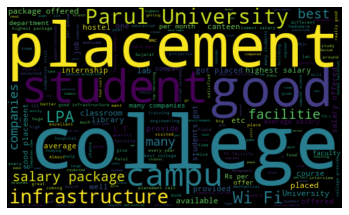

In [35]:
from wordcloud import WordCloud
# word cloud visualization
allWords = ' '.join([twts for twts in tweet_df['Content']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [36]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'
tweet_df['Analysis'] = tweet_df['Polarity'].apply(getAnalysis)
# Show the dataframe
tweet_df

,Content,Subjectivity,Polarity,Analysis
0,"I am satisfied with the teaching and teachers we get. In the chemical engineering field, the max...",0.650000,0.347500,Positive
1,Our college is good for education and any other activities.The placement rate is quite high here...,0.373571,0.221071,Positive
2,It is a life-building path college.It is one of the finest colleges in Vadodara Gujarat. Our col...,0.550000,0.550000,Positive
3,"The college life is good, but your career depends on you and you alone.I don't know the exact pe...",0.476238,0.169952,Positive
4,Review of Parul University.Almost 60% of the students got placement from the civil engineering d...,0.475000,0.337500,Positive
...,...,...,...,...
1063,Parul University has really good environment and infrastructure.There were good placements for o...,0.420000,0.330000,Positive
1064,"It is the best university in Western India.It is the best university in Gujarat, which provides ...",0.530000,0.651667,Positive
1065,The college provides a great theory but lacks practical knowledge.Many companies visit the colle...,0.547917,0.347917,Positive
1066,A classy college in terms of campus and placement.Around 50% of the students got selected for pl...,0.655556,0.259259,Positive


In [37]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = tweet_df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Content'][i])
    print()
    j= j+1

Printing positive tweets:

1) I am satisfied with the teaching and teachers we get. In the chemical engineering field, the maximum role offered by companies is GET trainee in chemical companies like alembic, DACL, Sterling Biotech, etc. In our batch, around 50% of the students got placed in different companies, and we are satisfied with our college placements.It has the largest infrastructure and facilities like library, food court, workshop and laboratory with all the equipment very useful for our study. We got all the facilities which we needed for our project work. In the ti...

2) Our college is good for education and any other activities.The placement rate is quite high here, even after a bachelor degree. Seminars and entrepreneurship opportunities are also provided to students. The international relationship cell is quite useful for students who are aspiring to study abroad. TCS, Wipro and Infosys visit here to offer placements for IT and CSE students.The library and hostel facil

In [38]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = tweet_df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Content'][i])
    print()
    j=j+1

Printing negative tweets:

1) The college has the average infrastructure, poor course curriculum and the worst mess food.Placements in our college were not up to the mark and students barely qualify for good placement. Few companies visited our college, among which were L&T and TCS, which were mass recruiters. More IT companies visited the college and also offers IT-based roles. Very few mechanical based companies visited that are tier 2 or tier 3 companies. Less than 50% of the students got placed in total with an average salary package of 2-3 LPA and the highest salary package of 5 LPA. The college has a placeme...

2) Joining this university is waste of money.The placements in our college are very worse. Small companies come to the college for the placements with a very low package. The worst part is that the only students who had paid the placement fee are allowed for the placements. Very few small companies are coming to the college for the placements. This results in the bad imag

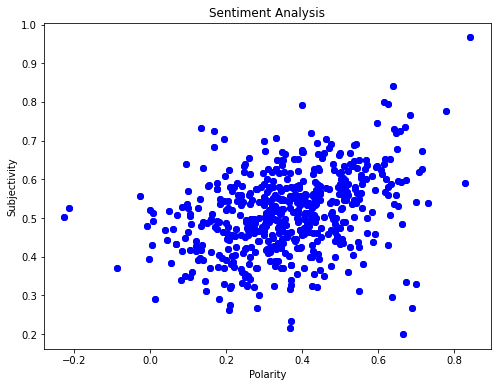

In [39]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, tweet_df.shape[0]):
  plt.scatter(tweet_df["Polarity"][i], tweet_df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [40]:
# Print the percentage of positive tweets
ptweets = tweet_df[tweet_df.Analysis == 'Positive']
ptweets = ptweets['Content']
ptweets

round( (ptweets.shape[0] / tweet_df.shape[0]) * 100 , 1)

98.7

In [41]:
# Print the percentage of negative tweets
ntweets = tweet_df[tweet_df.Analysis == 'Negative']
ntweets = ntweets['Content']
ntweets

round( (ntweets.shape[0] /  tweet_df.shape[0]) * 100, 1)

1.3

In [42]:
# Print the percentage of positive tweets
ptweets = tweet_df[tweet_df.Analysis == 'Neutral']
ptweets = ptweets['Content']
ptweets

round( (ptweets.shape[0] / tweet_df.shape[0]) * 100 , 1)

0.0

In [43]:
# Show the value counts
tweet_df['Analysis'].value_counts()

Positive    1054
Negative      14
Name: Analysis, dtype: int64

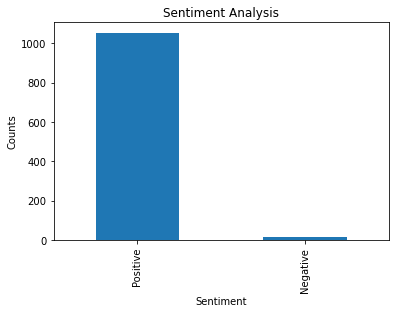

In [44]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
tweet_df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()